<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>RISE2.0 Business and Data Analytics</h1>
            <h2>IU 3.7.2.1 Machine Learning Project</h2>
            <h3>Business Case 1 - Supervised Learning</h3>
        </th>
    </tr>
</table>

## Context

### Bank Customer Churn Prediction
Customer churn, also known as customer attrition, refers to the phenomenon whereby a customer ceases engagement with a company's services. Studies have shown that acquiring new customers can cost five times more than retaining existing customers. It is little wonder that banks are finding it increasingly important to track and retain existing customers. 

You are a data analyst working in one of the largest bank by assets in SEA. It is the largest payment bank in terms of transaction value. You are tasked to analyze and prevent customers portfolio attrition by creating a predictive model to identify customers with a higher propensity to churn, based on the customers' personal information and past history with the bank.

## Objectives
Based on what you have learnt in the course: 
1. Load the Bank Churn dataset and perform any necessary data preprocessing
2. Perform Exploratory Data Analysis (EDA) on the preprocessed dataset
3. Implement feature selection using suitable statistical techniques
4. Train, validate and evaluate a Supervised Learning model
5. Implement an optimal Supervised Learning model to address specific business needs

## Dataset

You are provided with the following files:
1. bank_churn.csv
2. Data Dictionary - Bank Churn.xlsx

### Step 1: Import Data and Perform Data Preprocessing [5 marks]

#### 1.1 Import packages

In [1]:
# Import the required packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Machine Learning from scikit-learn - Taking Logistic Regression as the outcome I need is Binomical outcome. 

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, f1_score)
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler

#### 1.2 Load data into DataFrame

In [2]:
# Import bank churn dataset

file_path = 'Data/bank_churn.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
dataset.head()


,CID,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 1.3 Drop unnecessary column(s) and encode categorical variables

In [3]:
#check for null values

# Checking for null values in each column
null_values = dataset.isnull().sum()

# Displaying the count of null values per column
print(null_values)


CID                0
CreditScore        0
Country            0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64


In [4]:
print("Based on the output above it looks like there are no null values in this data given.\n")

print("As there are no null values in the data there will not be any null value treatment.\n")

Based on the output above it looks like there are no null values in this data given.

As there are no null values in the data there will not be any null value treatment.



In [5]:
# Drop customer ID column

# Dropping the 'CID' column
dataset = dataset.drop(columns=['CID'])

# Display the first few rows to verify the column is dropped
dataset.head()


,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Perform one-hot encoding of the categorical variables

# One-hot encoding the 'Country' and 'Gender' columns
dataset_encoded = pd.get_dummies(dataset, columns=['Country', 'Gender'])

# Display the first few rows to verify the changes
dataset_encoded.head()
# 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [7]:
# As get_dummies added True and False as encoding I converted it to 0 and 1 instead. 

dataset_encoded = dataset_encoded.astype(int)

dataset_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


### Step 2: Perform EDA on the dataset [10 marks]

#### 2.1 Check correlation of variables

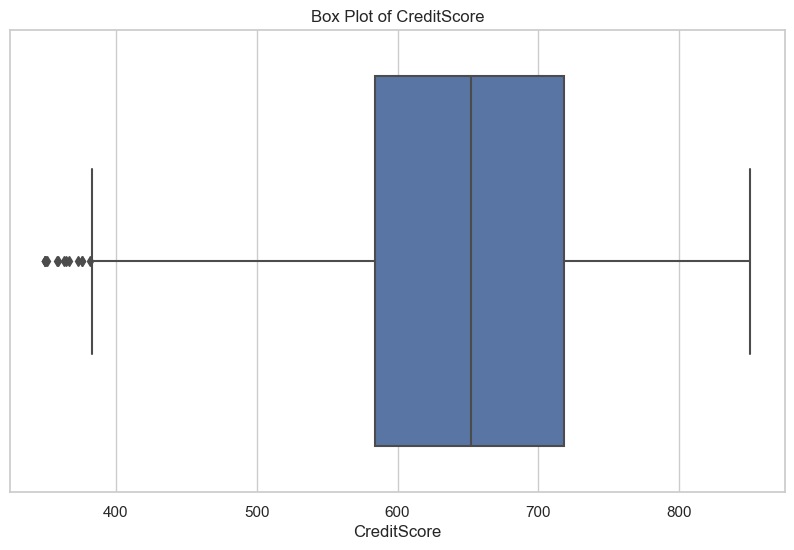

In [8]:

sns.set(style="whitegrid")

# Creating a box plot for CreditScore
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset_encoded['CreditScore'])

plt.title('Box Plot of CreditScore')
plt.xlabel('CreditScore')
plt.show()


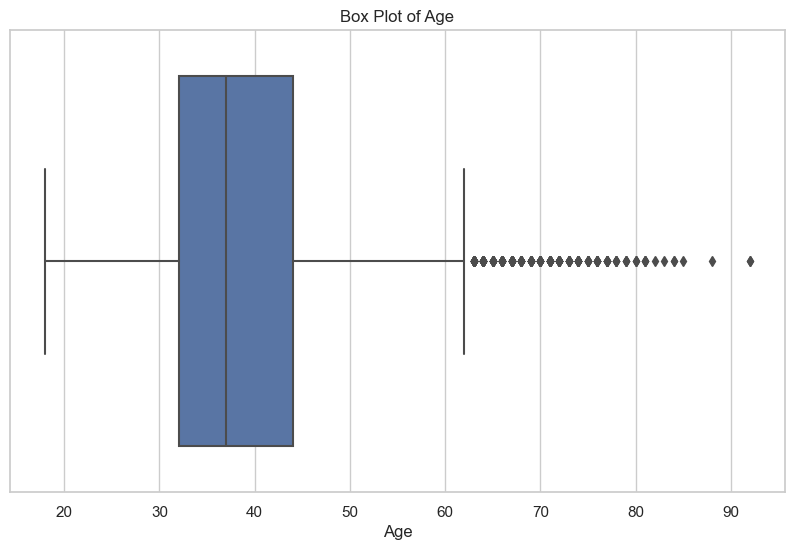

In [9]:

sns.set(style="whitegrid")

# Creating a box plot for CreditScore
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset_encoded['Age'])

plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [10]:
columns_to_check = ['Balance', 'EstimatedSalary', 'Age','CreditScore']
outliers_counts = {}

for column in columns_to_check:
    Q1 = dataset_encoded[column].quantile(0.25)
    Q3 = dataset_encoded[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = dataset_encoded[(dataset_encoded[column] < lower_bound) | (dataset_encoded[column] > upper_bound)].shape[0]
    outliers_counts[column] = outliers_count
    if column == 'Age': 
        print("inside if\n")
        age_outliers = dataset_encoded[(dataset_encoded[column] < lower_bound) | (dataset_encoded[column] > upper_bound)][column]
        print(age_outliers)

for column, count in outliers_counts.items():
    print(f"Number of outliers in '{column}': {count}")


inside if

58      66
85      75
104     65
158     73
181     65
        ..
9753    68
9765    64
9832    64
9894    77
9936    77
Name: Age, Length: 359, dtype: int64
Number of outliers in 'Balance': 0
Number of outliers in 'EstimatedSalary': 0
Number of outliers in 'Age': 359
Number of outliers in 'CreditScore': 15


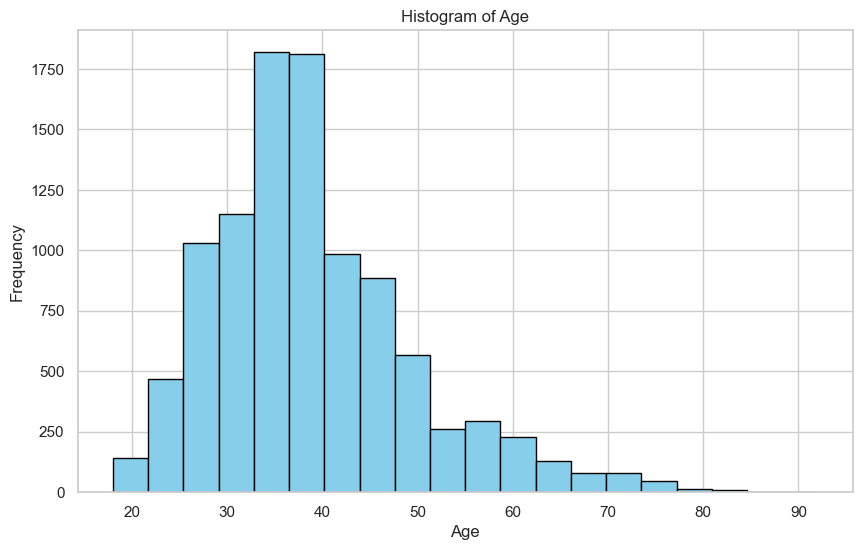

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [11]:
# Let us see the distribution of the Age values in the data. 
# Create a histogram for the Age variable
plt.figure(figsize=(10, 6))
plt.hist(dataset_encoded['Age'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print(dataset_encoded['Age'].describe())

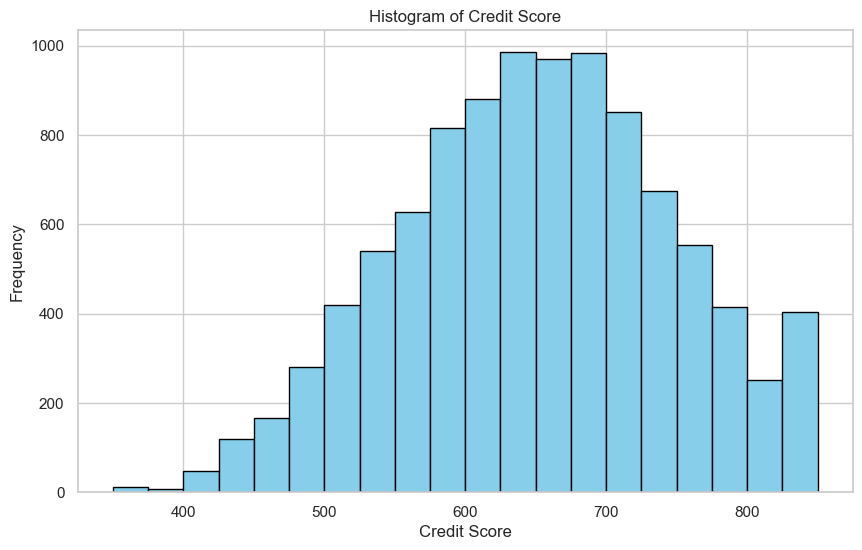

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


In [12]:
# Let us see the distribution of the CerditScore values in the data. 
# Create a histogram for the CreditScore variable
plt.figure(figsize=(10, 6))
plt.hist(dataset_encoded['CreditScore'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

print(dataset_encoded['CreditScore'].describe())

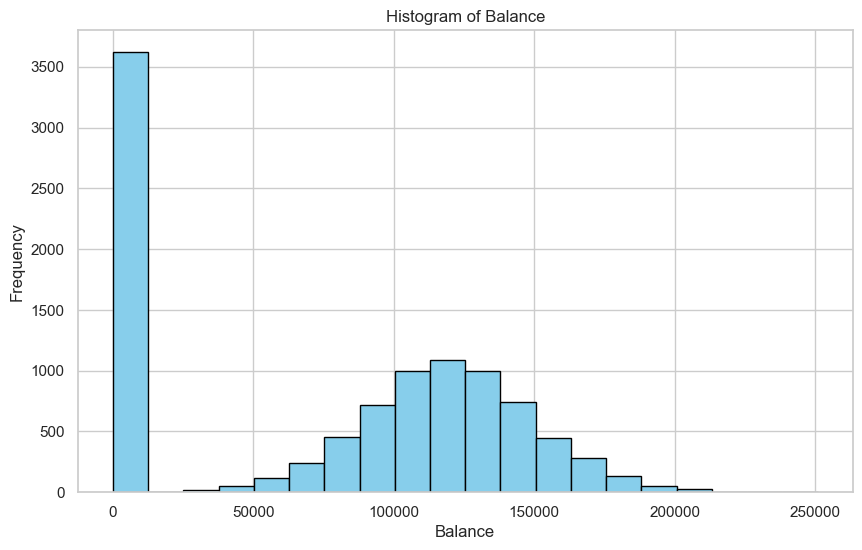

count     10000.000000
mean      76485.571500
std       62397.185107
min           0.000000
25%           0.000000
50%       97198.000000
75%      127643.750000
max      250898.000000
Name: Balance, dtype: float64


In [13]:
# Let us see the distribution of the Balance values in the data. 
# Create a histogram for the Balance variable
plt.figure(figsize=(10, 6))
plt.hist(dataset_encoded['Balance'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

print(dataset_encoded['Balance'].describe())

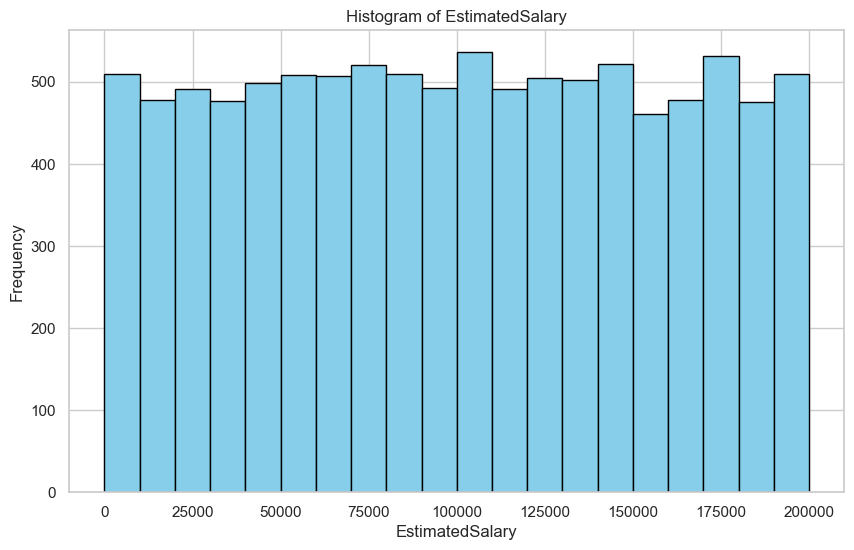

count     10000.000000
mean     100089.748400
std       57510.491042
min          11.000000
25%       51001.750000
50%      100193.500000
75%      149387.750000
max      199992.000000
Name: EstimatedSalary, dtype: float64


In [14]:
# Let us see the distribution of the EstimatedSalary values in the data. 
# Create a histogram for the EstimatedSalary variable
plt.figure(figsize=(10, 6))
plt.hist(dataset_encoded['EstimatedSalary'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

print(dataset_encoded['EstimatedSalary'].describe())

In [15]:
# Trying 2 different outlier treatments 

# Function to calculate lower and upper bounds for capping or dropping outliers
def calculate_bounds(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Capping outliers
def cap_outliers(dataframe, column):
    lower_bound, upper_bound = calculate_bounds(dataframe[column])
    dataframe[column] = dataframe[column].clip(lower=lower_bound, upper=upper_bound)
    return dataframe

# Dropping outliers
def drop_outliers(dataframe, column):
    lower_bound, upper_bound = calculate_bounds(dataframe[column])
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Creating the capped dataset
dataset_capped = dataset_encoded.copy()
for column in ['Age', 'CreditScore']:
    dataset_capped = cap_outliers(dataset_capped, column)

# Creating the dropped dataset
dataset_dropped = dataset_encoded.copy()
for column in ['Age', 'CreditScore']:
    dataset_dropped = drop_outliers(dataset_dropped, column)

# Showing the size of the original, capped, and dropped datasets
print(f"Original Dataset Size: {len(dataset_encoded)}")
print(f"Capped Dataset Size: {len(dataset_capped)}")
print(f"Dropped Dataset Size: {len(dataset_dropped)}")


Original Dataset Size: 10000
Capped Dataset Size: 10000
Dropped Dataset Size: 9627


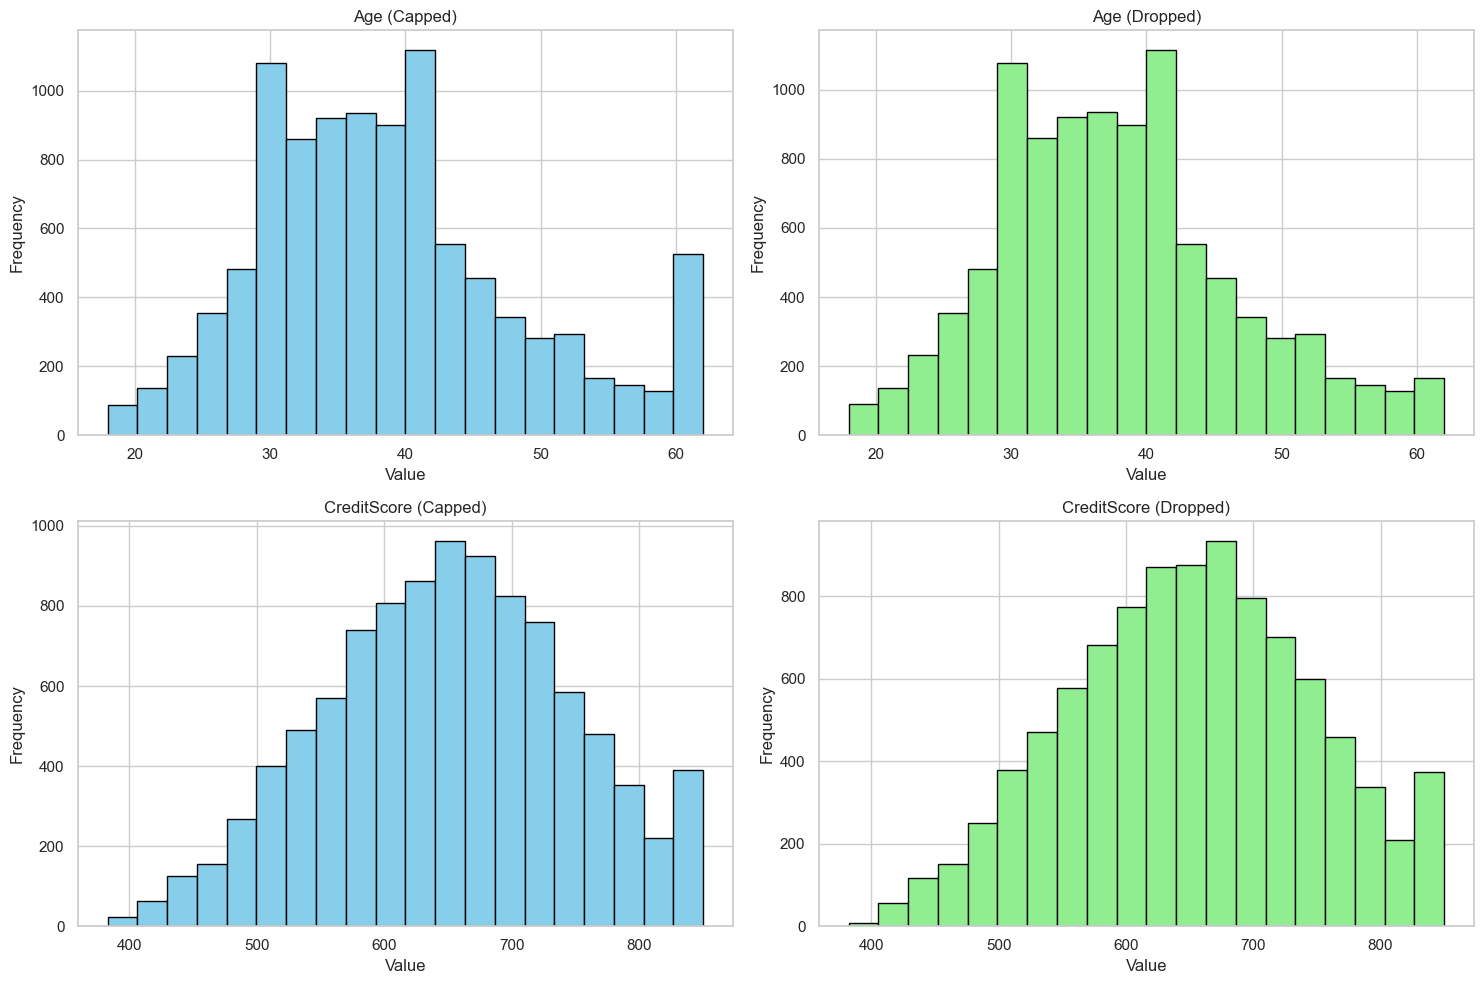

In [16]:
# Let us see the distribution of the Age and Credit Score values in the treated data. 

# Setting up the figure and axes for a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Titles for the plots
titles = ['Age (Capped)', 'Age (Dropped)', 'CreditScore (Capped)', 'CreditScore (Dropped)']

# Plotting Age histograms for capped and dropped datasets
axes[0, 0].hist(dataset_capped['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 1].hist(dataset_dropped['Age'], bins=20, color='lightgreen', edgecolor='black')

# Plotting CreditScore histograms for capped and dropped datasets
axes[1, 0].hist(dataset_capped['CreditScore'], bins=20, color='skyblue', edgecolor='black')
axes[1, 1].hist(dataset_dropped['CreditScore'], bins=20, color='lightgreen', edgecolor='black')

# Setting titles for individual plots
axes[0, 0].set_title('Age (Capped)')
axes[0, 1].set_title('Age (Dropped)')
axes[1, 0].set_title('CreditScore (Capped)')
axes[1, 1].set_title('CreditScore (Dropped)')

# Setting the labels
for ax in axes.flat:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [17]:
print("Later in the Machine Learning I shall try to use both of these and will try to see which one performs better.\n")

Later in the Machine Learning I shall try to use both of these and will try to see which one performs better.



In [18]:
dataset_capped.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


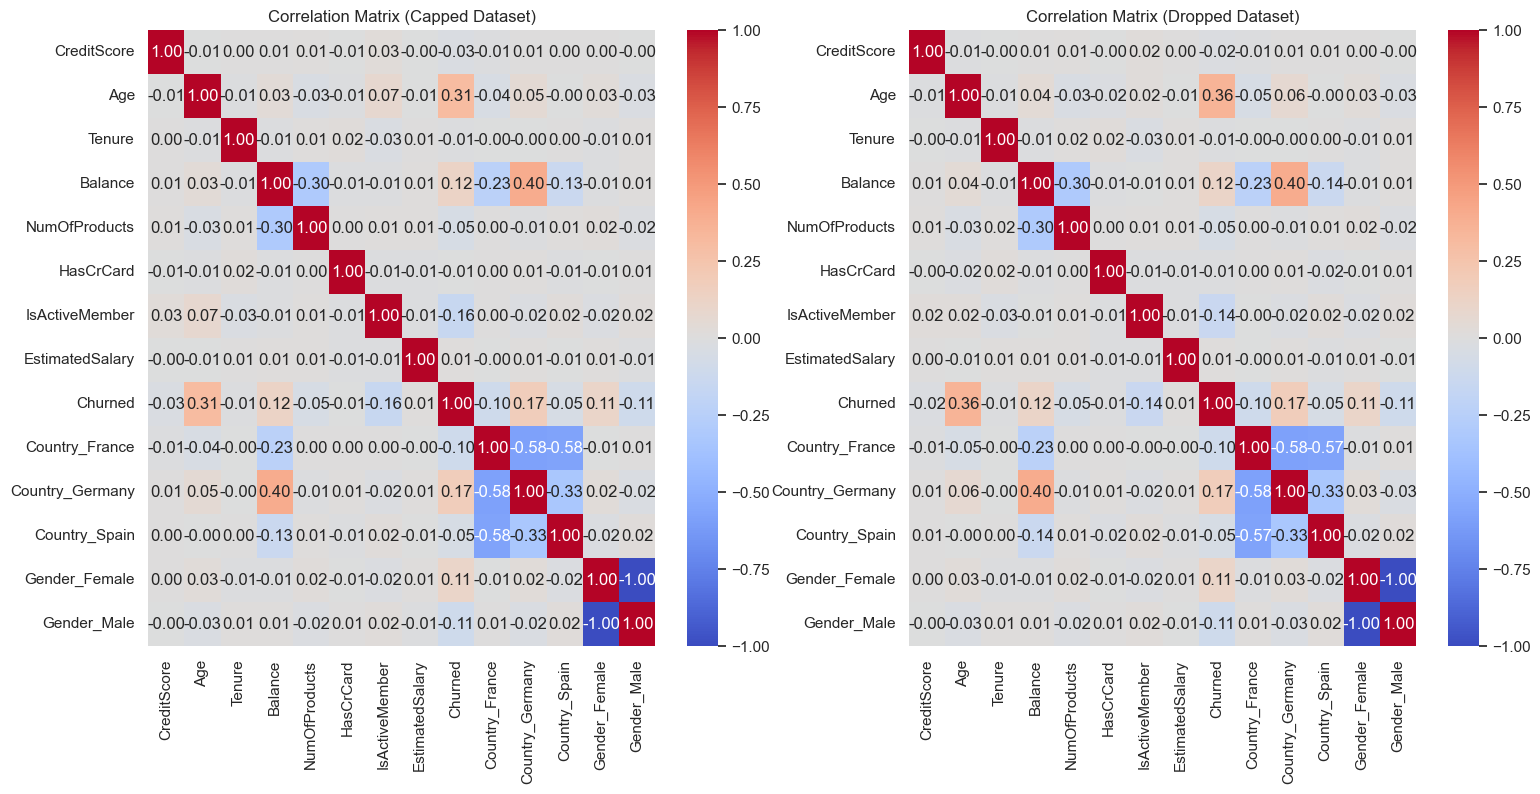

In [19]:
# Explore correlations of the features

# Calculate correlation matrices for both datasets
corr_capped = dataset_capped.corr()
corr_dropped = dataset_dropped.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(18, 8))

# Plotting heatmap for the capped dataset
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.heatmap(corr_capped, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Capped Dataset)')

# Plotting heatmap for the dropped dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.heatmap(corr_dropped, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Dropped Dataset)')

# Show the plots
plt.show()


In [20]:
# Set a correlation threshold and remove unnecessary feature (if any)

def remove_highly_correlated_features(df, threshold=0.7):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Find pairs of highly correlated features
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Drop features from the dataframe
    df_reduced = df.drop(to_drop, axis=1, inplace=False)
    return df_reduced, to_drop

# Applying the function to your dataset
# Setting the correlation threshold to 0.7
corr_threshold = 0.7

dataset_capped_reduced, dropped_columns_capped = remove_highly_correlated_features(dataset_capped, threshold=corr_threshold)
print("Dropped columns from dataset_capped due to high correlation:", dropped_columns_capped)

dataset_dropped_reduced, dropped_columns_dropped = remove_highly_correlated_features(dataset_dropped, threshold=corr_threshold)
print("Dropped columns from dataset_dropped due to high correlation:", dropped_columns_dropped)


Dropped columns from dataset_capped due to high correlation: ['Gender_Male']
Dropped columns from dataset_dropped due to high correlation: ['Gender_Male']


In [21]:
dataset_capped_reduced.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_France,Country_Germany,Country_Spain,Gender_Female
0,619,42,2,0,1,1,1,101348,1,1,0,0,1
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1
3,699,39,1,0,2,0,0,93826,0,1,0,0,1
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1


In [22]:
dataset_dropped_reduced.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_France,Country_Germany,Country_Spain,Gender_Female
0,619,42,2,0,1,1,1,101348,1,1,0,0,1
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1
3,699,39,1,0,2,0,0,93826,0,1,0,0,1
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1


In [23]:
print("We added multicollinearity when we did one-hot-encoding for Country.\n")
print("To address the issue we shall drop one country from the dataset. So lets drop Country_France column.\n")

We added multicollinearity when we did one-hot-encoding for Country.

To address the issue we shall drop one country from the dataset. So lets drop Country_France column.



In [24]:
# Drop one of the one-hot encoded 'Country' columns
dataset_capped_reduced = dataset_capped_reduced.drop('Country_France', axis=1)
dataset_dropped_reduced = dataset_dropped_reduced.drop('Country_France', axis=1)


In [25]:
dataset_dropped_reduced.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_Germany,Country_Spain,Gender_Female
0,619,42,2,0,1,1,1,101348,1,0,0,1
1,608,41,1,83807,1,0,1,112542,0,0,1,1
2,502,42,8,159660,3,1,0,113931,1,0,0,1
3,699,39,1,0,2,0,0,93826,0,0,0,1
4,850,43,2,125510,1,1,1,79084,0,0,1,1


In [26]:
dataset_capped_reduced.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_Germany,Country_Spain,Gender_Female
0,619,42,2,0,1,1,1,101348,1,0,0,1
1,608,41,1,83807,1,0,1,112542,0,0,1,1
2,502,42,8,159660,3,1,0,113931,1,0,0,1
3,699,39,1,0,2,0,0,93826,0,0,0,1
4,850,43,2,125510,1,1,1,79084,0,0,1,1


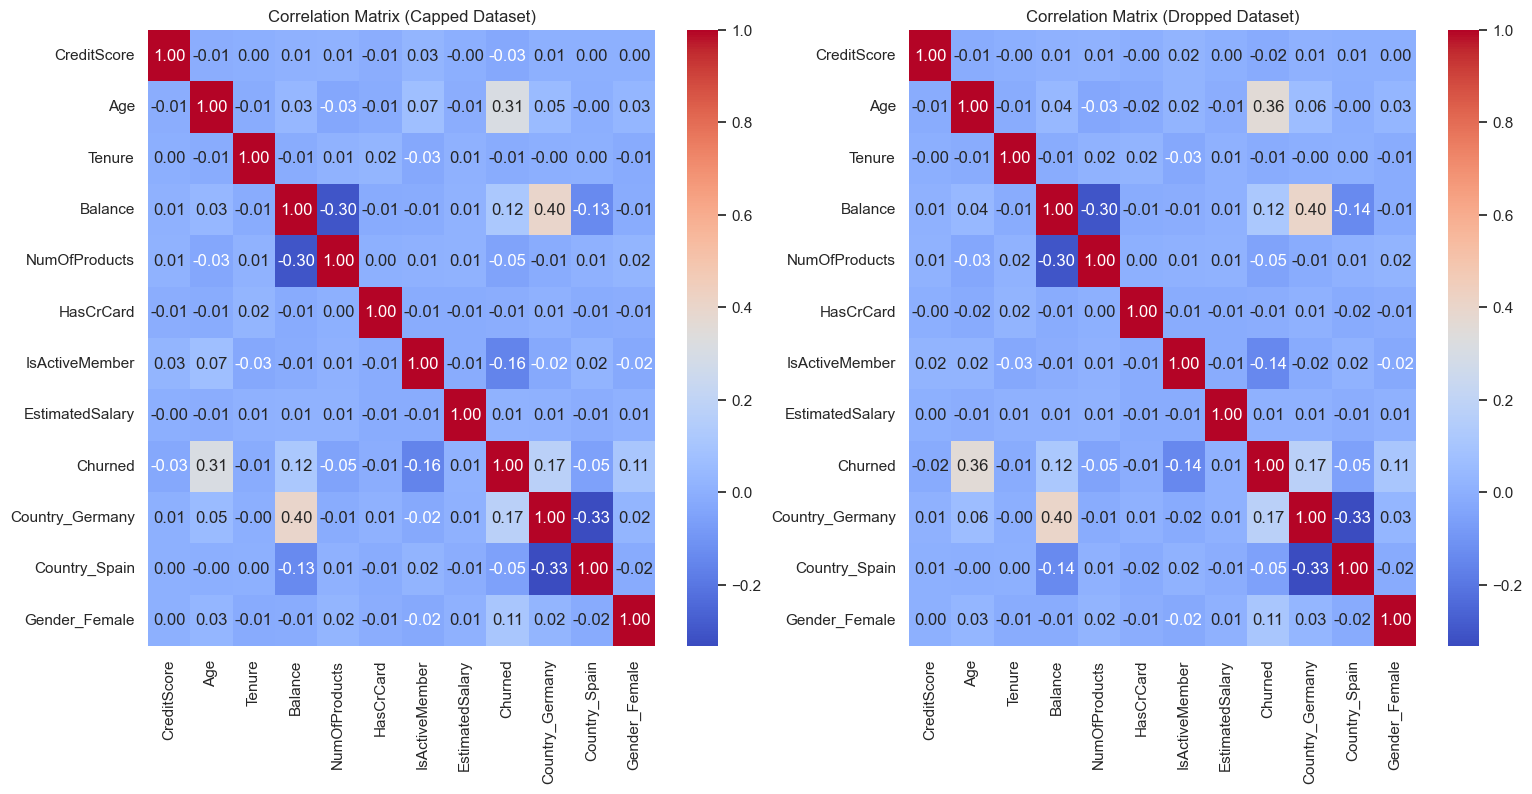

In [27]:
# Explore correlations of the features again after we drop columns 

# Calculate correlation matrices for both datasets
corr_capped = dataset_capped_reduced.corr()
corr_dropped = dataset_dropped_reduced.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(18, 8))

# Plotting heatmap for the capped dataset
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.heatmap(corr_capped, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Capped Dataset)')

# Plotting heatmap for the dropped dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.heatmap(corr_dropped, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Dropped Dataset)')

# Show the plots
plt.show()


#### 2.2 Check VIF of variables and drop necessary columns

In [52]:
# Explore Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = dataset_capped_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(dataset_capped_reduced.values, i) for i in range(len(dataset_capped_reduced.columns))]

print("VIF Score for dataset_capped_reduced\n")
print(vif_data.sort_values(by="VIF", ascending=False))

vif_data_dropped = pd.DataFrame()
vif_data_dropped["feature"] = dataset_dropped_reduced.columns
vif_data_dropped["VIF"] = [variance_inflation_factor(dataset_dropped_reduced.values, i) for i in range(len(dataset_dropped_reduced.columns))]

print("\n\nVIF Score for dataset_dropped_reduced\n")
print(vif_data_dropped.sort_values(by="VIF", ascending=False))


VIF Score for dataset_capped_reduced

            feature        VIF
0       CreditScore  21.860069
1               Age  15.270093
4     NumOfProducts   7.879127
7   EstimatedSalary   3.892063
2            Tenure   3.871773
5         HasCrCard   3.290174
3           Balance   3.184558
6    IsActiveMember   2.146897
11    Gender_Female   1.841008
9   Country_Germany   1.816258
8           Churned   1.497275
10    Country_Spain   1.486342


VIF Score for dataset_dropped_reduced

            feature        VIF
0       CreditScore  22.901959
1               Age  17.351429
4     NumOfProducts   7.956668
7   EstimatedSalary   3.901003
2            Tenure   3.887926
5         HasCrCard   3.289984
3           Balance   3.195772
6    IsActiveMember   2.060774
11    Gender_Female   1.839316
9   Country_Germany   1.817441
8           Churned   1.519304
10    Country_Spain   1.486546


In [53]:
# Drop columns where VIF > VIF threshold

def drop_high_vif_features(df, threshold=8.0):
    # Keep iterating as long as we have a high VIF value
    while True:
        # Calculate VIFs for the current state of the dataframe
        vif_data = pd.DataFrame()
        vif_data["feature"] = df.columns
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        
        # Check if the max VIF is above the threshold
        max_vif = max(vif_data["VIF"])
        if max_vif > threshold:
            # Identify the feature with the maximum VIF
            max_vif_feature = vif_data.loc[vif_data["VIF"] == max_vif, "feature"].iloc[0]
            print(f"Dropping '{max_vif_feature}' with VIF of {max_vif}")
            # Drop the feature
            df = df.drop(columns=[max_vif_feature])
        else:
            break
            
    return df

# Assuming 'dataset_capped_reduced' and 'dataset_dropped_reduced' are your datasets
# Apply the function to both datasets
# Set VIF thresold to 8.0
vif_thresold = 8.0

dataset_capped_reduced_vif = drop_high_vif_features(dataset_capped_reduced.select_dtypes(include=[np.number]), threshold=vif_thresold)
dataset_dropped_reduced_vif = drop_high_vif_features(dataset_dropped_reduced.select_dtypes(include=[np.number]), threshold=vif_thresold)

print("Finished dropping columns based on VIF threshold.\n\n")


# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = dataset_capped_reduced_vif.columns
vif_data["VIF"] = [variance_inflation_factor(dataset_capped_reduced_vif.values, i) for i in range(len(dataset_capped_reduced_vif.columns))]

print("VIF Score for dataset_capped_reduced_vif\n")
print(vif_data.sort_values(by="VIF", ascending=False))

vif_data_dropped = pd.DataFrame()
vif_data_dropped["feature"] = dataset_dropped_reduced_vif.columns
vif_data_dropped["VIF"] = [variance_inflation_factor(dataset_dropped_reduced_vif.values, i) for i in range(len(dataset_dropped_reduced_vif.columns))]

print("\n\nVIF Score for dataset_dropped_reduced_vif\n")
print(vif_data_dropped.sort_values(by="VIF", ascending=False))


Dropping 'CreditScore' with VIF of 21.860069357990774
Dropping 'Age' with VIF of 11.259463393098837
Dropping 'CreditScore' with VIF of 22.901958947746373
Dropping 'Age' with VIF of 12.274202239732741
Finished dropping columns based on VIF threshold.


VIF Score for dataset_capped_reduced_vif

           feature       VIF
2    NumOfProducts  5.254316
5  EstimatedSalary  3.556746
0           Tenure  3.511799
3        HasCrCard  3.039084
1          Balance  2.741508
4   IsActiveMember  1.991468
7  Country_Germany  1.815157
9    Gender_Female  1.797194
8    Country_Spain  1.453770
6          Churned  1.329841


VIF Score for dataset_dropped_reduced_vif

           feature       VIF
2    NumOfProducts  5.259093
5  EstimatedSalary  3.551267
0           Tenure  3.522991
3        HasCrCard  3.030592
1          Balance  2.738952
4   IsActiveMember  1.946286
7  Country_Germany  1.816311
9    Gender_Female  1.795426
8    Country_Spain  1.451772
6          Churned  1.322682


In [54]:
print("For now we shall leave VIF thresold to 8.0\n")
print("Later if needed we can drop variable NumOfProducts to see the impact on our model's performance\n")

For now we shall leave VIF thresold to 8.0

Later if needed we can drop variable NumOfProducts to see the impact on our model's performance



In [55]:
dataset_capped_reduced_vif.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_Germany,Country_Spain,Gender_Female
0,2,0,1,1,1,101348,1,0,0,1
1,1,83807,1,0,1,112542,0,0,1,1
2,8,159660,3,1,0,113931,1,0,0,1
3,1,0,2,0,0,93826,0,0,0,1
4,2,125510,1,1,1,79084,0,0,1,1


In [56]:
dataset_dropped_reduced_vif.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Country_Germany,Country_Spain,Gender_Female
0,2,0,1,1,1,101348,1,0,0,1
1,1,83807,1,0,1,112542,0,0,1,1
2,8,159660,3,1,0,113931,1,0,0,1
3,1,0,2,0,0,93826,0,0,0,1
4,2,125510,1,1,1,79084,0,0,1,1


#### 2.3 Perform train-test split of data

In [57]:
# Set "Churned" as target feature and the rest as input features

from sklearn.model_selection import train_test_split

# Define input features and target for the first dataset
X_capped = dataset_capped_reduced_vif.drop('Churned', axis=1)
y_capped = dataset_capped_reduced_vif['Churned']

# Define input features and target for the second dataset
X_dropped = dataset_dropped_reduced_vif.drop('Churned', axis=1)
y_dropped = dataset_dropped_reduced_vif['Churned']

# Perform the train-test split for the capped dataset
X_capped_train, X_capped_test, y_capped_train, y_capped_test = train_test_split(
    X_capped, y_capped, test_size=0.2, random_state=42)

# Perform the train-test split for the dropped dataset
X_dropped_train, X_dropped_test, y_dropped_train, y_dropped_test = train_test_split(
    X_dropped, y_dropped, test_size=0.2, random_state=42)

print("Train-test split done for both datasets.")


Train-test split done for both datasets.


In [58]:
# Scale the input features

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform training and test data for the capped dataset
X_capped_train_scaled = scaler.fit_transform(X_capped_train)
X_capped_test_scaled = scaler.transform(X_capped_test)

# Fit the scaler to the training data and transform training and test data for the dropped dataset
# Note: It's important to fit the scaler on the training data only to prevent data leakage
scaler.fit(X_dropped_train)
X_dropped_train_scaled = scaler.transform(X_dropped_train)
X_dropped_test_scaled = scaler.transform(X_dropped_test)

print("Scaling of input features for both datasets is complete.")


Scaling of input features for both datasets is complete.


In [59]:
# Split the data into training and testing sets
print("This is already done above\n")

This is already done above



### Step 3: Train and Finetune the Models [15 marks]

#### 3.1 Model 1 - Create Classification Model

In [60]:
# Model Building
# Create an instance of a classification model (e.g. LogisticRegression, DecisionTreeClassifier etc)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model for both capped and dropped so that we can compare them
log_reg_capped = LogisticRegression()
log_reg_dropped = LogisticRegression()

In [61]:
# Fit the model on training datasets
print("\nWe shall Fit both the datasets one capped and one dropped to compare effect on accuracy\n")

log_reg_capped.fit(X_capped_train_scaled, y_capped_train)
log_reg_dropped.fit(X_dropped_train_scaled, y_dropped_train)


We shall Fit both the datasets one capped and one dropped to compare effect on accuracy



LogisticRegression()

In [62]:
# Compute predictions on training and testing sets

# Predictions on the training set
y_capped_train_pred = log_reg_capped.predict(X_capped_train_scaled)
y_dropped_train_pred = log_reg_dropped.predict(X_dropped_train_scaled)

# Predictions on the testing set were already computed as y_capped_pred and y_dropped_pred
# For clarity and consistency, let's include those predictions here again:
y_capped_test_pred = log_reg_capped.predict(X_capped_test_scaled)
y_dropped_test_pred = log_reg_dropped.predict(X_dropped_test_scaled)

print("Predictions saved for both test and train datasets.\n")

Predictions saved for both test and train datasets.



In [65]:
# Evaluate the model using suitable metrics (e.g. accuracy, F1 score etc)

# Computing accuracy for the capped dataset:
accuracy_capped_train = accuracy_score(y_capped_train, y_capped_train_pred)
accuracy_capped_test = accuracy_score(y_capped_test, y_capped_test_pred)

# And for the dropped dataset:
accuracy_dropped_train = accuracy_score(y_dropped_train, y_dropped_train_pred)
accuracy_dropped_test = accuracy_score(y_dropped_test, y_dropped_test_pred)

# Print the results
print(f"Training Accuracy (Capped Dataset): {accuracy_capped_train}\n")
print(f"Testing Accuracy (Capped Dataset): {accuracy_capped_test}\n")
print(f"Training Accuracy (Dropped Dataset): {accuracy_dropped_train}\n")
print(f"Testing Accuracy (Dropped Dataset): {accuracy_dropped_test}\n")

if accuracy_capped_test >= accuracy_dropped_test:
    print("\nModel Performance with Capped Dataset is better\n")
else:
    print("\nModel Performance with Dropped Dataset is better\n")

Training Accuracy (Capped Dataset): 0.79475

Testing Accuracy (Capped Dataset): 0.8055

Training Accuracy (Dropped Dataset): 0.7988572912608752

Testing Accuracy (Dropped Dataset): 0.7855659397715472


Model Performance with Capped Dataset is better



In [67]:
from sklearn.metrics import confusion_matrix, f1_score

# Confusion matrices
conf_matrix_capped_train = confusion_matrix(y_capped_train, y_capped_train_pred)
conf_matrix_capped_test = confusion_matrix(y_capped_test, y_capped_test_pred)
conf_matrix_dropped_train = confusion_matrix(y_dropped_train, y_dropped_train_pred)
conf_matrix_dropped_test = confusion_matrix(y_dropped_test, y_dropped_test_pred)

# F1 scores
f1_score_capped_train = f1_score(y_capped_train, y_capped_train_pred)
f1_score_capped_test = f1_score(y_capped_test, y_capped_test_pred)
f1_score_dropped_train = f1_score(y_dropped_train, y_dropped_train_pred)
f1_score_dropped_test = f1_score(y_dropped_test, y_dropped_test_pred)

# Printing the results
print("Confusion Matrix - Training (Capped Dataset):\n", conf_matrix_capped_train)
print("Confusion Matrix - Testing (Capped Dataset):\n", conf_matrix_capped_test)
print("F1 Score - Training (Capped Dataset):", f1_score_capped_train)
print("F1 Score - Testing (Capped Dataset):", f1_score_capped_test)

print("\nConfusion Matrix - Training (Dropped Dataset):\n", conf_matrix_dropped_train)
print("Confusion Matrix - Testing (Dropped Dataset):\n", conf_matrix_dropped_test)
print("F1 Score - Training (Dropped Dataset):", f1_score_dropped_train)
print("F1 Score - Testing (Dropped Dataset):", f1_score_dropped_test)

if f1_score_capped_test >= f1_score_dropped_test:
    print("\nModel Performance with Capped Dataset is better\n")
else:
    print("\nModel Performance with Dropped Dataset is better\n")

Confusion Matrix - Training (Capped Dataset):
 [[6307   49]
 [1593   51]]
Confusion Matrix - Testing (Capped Dataset):
 [[1594   13]
 [ 376   17]]
F1 Score - Training (Capped Dataset): 0.05848623853211008
F1 Score - Testing (Capped Dataset): 0.08037825059101654

Confusion Matrix - Training (Dropped Dataset):
 [[6146   17]
 [1532    6]]
Confusion Matrix - Testing (Dropped Dataset):
 [[1511    3]
 [ 410    2]]
F1 Score - Training (Dropped Dataset): 0.007687379884689302
F1 Score - Testing (Dropped Dataset): 0.009592326139088728

Model Performance with Capped Dataset is better



In [68]:
print("I am not happy with F1 Score. So trying something different.\n")

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' work with 'l1' penalty
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=1)

# Fit it to the scaled training data
grid_search.fit(X_capped_train_scaled, y_capped_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)


I am not happy with F1 Score. So trying something different.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 score: 0.05673749197014075


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the scaled training data
# Example using the capped dataset
dt_classifier.fit(X_capped_train_scaled, y_capped_train)

# Predict on the training set and the testing set
y_capped_train_pred_dt = dt_classifier.predict(X_capped_train_scaled)
y_capped_test_pred_dt = dt_classifier.predict(X_capped_test_scaled)

# Evaluate the classifier
# Calculate accuracy and F1 score for both training and testing sets
accuracy_train_capped_dt = accuracy_score(y_capped_train, y_capped_train_pred_dt)
accuracy_test_capped_dt = accuracy_score(y_capped_test, y_capped_test_pred_dt)
f1_score_train_capped_dt = f1_score(y_capped_train, y_capped_train_pred_dt)
f1_score_test_capped_dt = f1_score(y_capped_test, y_capped_test_pred_dt)

print(f"Training Accuracy (Capped Dataset - Decision Tree): {accuracy_train_capped_dt}")
print(f"Testing Accuracy (Capped Dataset - Decision Tree): {accuracy_test_capped_dt}")
print(f"Training F1 Score (Capped Dataset - Decision Tree): {f1_score_train_capped_dt}")
print(f"Testing F1 Score (Capped Dataset - Decision Tree): {f1_score_test_capped_dt}")

# Display the confusion matrix for the testing set
conf_matrix_capped_dt = confusion_matrix(y_capped_test, y_capped_test_pred_dt)
print("Confusion Matrix (Capped Dataset - Decision Tree):")
print(conf_matrix_capped_dt)

# Classification report for the testing set
print("Classification Report (Capped Dataset - Decision Tree):")
print(classification_report(y_capped_test, y_capped_test_pred_dt))


# Initialize the Decision Tree Classifier
dt_classifier_dropped = DecisionTreeClassifier()

# Fit the classifier to the scaled training data from the dropped dataset
dt_classifier_dropped.fit(X_dropped_train_scaled, y_dropped_train)

# Predict on the training set and the testing set
y_dropped_train_pred_dt = dt_classifier_dropped.predict(X_dropped_train_scaled)
y_dropped_test_pred_dt = dt_classifier_dropped.predict(X_dropped_test_scaled)

# Evaluate the classifier
# Calculate accuracy and F1 score for both training and testing sets
accuracy_train_dropped_dt = accuracy_score(y_dropped_train, y_dropped_train_pred_dt)
accuracy_test_dropped_dt = accuracy_score(y_dropped_test, y_dropped_test_pred_dt)
f1_score_train_dropped_dt = f1_score(y_dropped_train, y_dropped_train_pred_dt)
f1_score_test_dropped_dt = f1_score(y_dropped_test, y_dropped_test_pred_dt)

print(f"Training Accuracy (Dropped Dataset - Decision Tree): {accuracy_train_dropped_dt}")
print(f"Testing Accuracy (Dropped Dataset - Decision Tree): {accuracy_test_dropped_dt}")
print(f"Training F1 Score (Dropped Dataset - Decision Tree): {f1_score_train_dropped_dt}")
print(f"Testing F1 Score (Dropped Dataset - Decision Tree): {f1_score_test_dropped_dt}")

# Display the confusion matrix for the testing set
conf_matrix_dropped_dt = confusion_matrix(y_dropped_test, y_dropped_test_pred_dt)
print("Confusion Matrix (Dropped Dataset - Decision Tree):")
print(conf_matrix_dropped_dt)

# Classification report for the testing set
print("Classification Report (Dropped Dataset - Decision Tree):")
print(classification_report(y_dropped_test, y_dropped_test_pred_dt))


Training Accuracy (Capped Dataset - Decision Tree): 1.0
Testing Accuracy (Capped Dataset - Decision Tree): 0.7575
Training F1 Score (Capped Dataset - Decision Tree): 1.0
Testing F1 Score (Capped Dataset - Decision Tree): 0.4106925880923451
Confusion Matrix (Capped Dataset - Decision Tree):
[[1346  261]
 [ 224  169]]
Classification Report (Capped Dataset - Decision Tree):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1607
           1       0.39      0.43      0.41       393

    accuracy                           0.76      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.77      0.76      0.76      2000

Training Accuracy (Dropped Dataset - Decision Tree): 1.0
Testing Accuracy (Dropped Dataset - Decision Tree): 0.7533748701973001
Training F1 Score (Dropped Dataset - Decision Tree): 1.0
Testing F1 Score (Dropped Dataset - Decision Tree): 0.4186046511627907
Confusion Matrix (Dropped Dataset - Decisio

#### 3.2 Model 2 - Create Logit model using statsmodel

In [70]:
# Prepare data for statsmodel

import statsmodels.api as sm

# Add a constant to the input features since statsmodels' Logistic Regression does not add one by default
X_capped_train_scaled_sm = sm.add_constant(X_capped_train_scaled)
X_dropped_train_scaled_sm = sm.add_constant(X_dropped_train_scaled)


In [71]:
# Build Logit model using data and display summary results

# Fit the Logistic Regression model using statsmodels on the capped dataset
logit_model_capped = sm.Logit(y_capped_train, X_capped_train_scaled_sm).fit()

# Print the summary of the model to see the coefficient p-values and other statistics
print(logit_model_capped.summary())

# Repeat the process for the dropped dataset
logit_model_dropped = sm.Logit(y_dropped_train, X_dropped_train_scaled_sm).fit()
print(logit_model_dropped.summary())


Optimization terminated successfully.
         Current function value: 0.474599
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Churned   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7990
Method:                           MLE   Df Model:                            9
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                 0.06563
Time:                        12:42:47   Log-Likelihood:                -3796.8
converged:                       True   LL-Null:                       -4063.5
Covariance Type:            nonrobust   LLR p-value:                4.140e-109
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4725      0.031    -48.266      0.000      -1.532      -1.413
x1            -0.0401      0.

#### 3.3 Drop variables with high p-values

In [72]:
# Identify variables with high p-value (>0.05)

# Extracting the p-values for each variable from the capped dataset model
p_values_capped = logit_model_capped.pvalues

# Identifying variables with p-values greater than 0.05 in the capped dataset
high_p_values_capped = p_values_capped[p_values_capped > 0.05]
print("Variables with high p-values in the capped dataset model:")
print(high_p_values_capped)

# Extracting the p-values for each variable from the dropped dataset model
p_values_dropped = logit_model_dropped.pvalues

# Identifying variables with p-values greater than 0.05 in the dropped dataset
high_p_values_dropped = p_values_dropped[p_values_dropped > 0.05]
print("\nVariables with high p-values in the dropped dataset model:")
print(high_p_values_dropped)


Variables with high p-values in the capped dataset model:
x1    0.161267
x4    0.451281
x6    0.594376
x8    0.158115
dtype: float64

Variables with high p-values in the dropped dataset model:
x1    0.157624
x4    0.342976
x6    0.513156
x8    0.788048
dtype: float64


In [73]:
# Drop variables with high p-value

# Get the summary as a pandas DataFrame for the capped model
summary_table_capped = pd.DataFrame(logit_model_capped.summary2().tables[1])

# Identify variables with p-value greater than 0.05 for the capped model
high_p_value_vars_capped = summary_table_capped[summary_table_capped['P>|z|'] > 0.05].index.tolist()
print("Variables to drop (Capped Model):", high_p_value_vars_capped)

# Repeat for the dropped model
summary_table_dropped = pd.DataFrame(logit_model_dropped.summary2().tables[1])
high_p_value_vars_dropped = summary_table_dropped[summary_table_dropped['P>|z|'] > 0.05].index.tolist()
print("Variables to drop (Dropped Model):", high_p_value_vars_dropped)


Variables to drop (Capped Model): ['x1', 'x4', 'x6', 'x8']
Variables to drop (Dropped Model): ['x1', 'x4', 'x6', 'x8']


In [75]:
# Dropping high p-value variables from the capped dataset's features

# Convert the scaled data back to pandas DataFrames, ensuring column names are preserved
X_capped_train_scaled_df = pd.DataFrame(X_capped_train_scaled, columns=[col for col in X_capped_train.columns if col in X_capped.columns])
X_dropped_train_scaled_df = pd.DataFrame(X_dropped_train_scaled, columns=[col for col in X_dropped_train.columns if col in X_dropped.columns])

# Add a constant to each DataFrame
X_capped_train_scaled_sm = sm.add_constant(X_capped_train_scaled_df)
X_dropped_train_scaled_sm = sm.add_constant(X_dropped_train_scaled_df)

# Assuming high_p_value_vars_capped and high_p_value_vars_dropped are already defined as lists of column names

# Dropping high p-value variables from the capped dataset's features
X_capped_train_scaled_sm_updated = X_capped_train_scaled_sm.drop(columns=high_p_value_vars_capped, errors='ignore')
X_capped_test_scaled_df = pd.DataFrame(X_capped_test_scaled, columns=X_capped_train_scaled_df.columns)
X_capped_test_scaled_sm_updated = sm.add_constant(X_capped_test_scaled_df).drop(columns=high_p_value_vars_capped, errors='ignore')

# Dropping high p-value variables from the dropped dataset's features
X_dropped_train_scaled_sm_updated = X_dropped_train_scaled_sm.drop(columns=high_p_value_vars_dropped, errors='ignore')
X_dropped_test_scaled_df = pd.DataFrame(X_dropped_test_scaled, columns=X_dropped_train_scaled_df.columns)
X_dropped_test_scaled_sm_updated = sm.add_constant(X_dropped_test_scaled_df).drop(columns=high_p_value_vars_dropped, errors='ignore')

print("Dropped variables with high p-value\n")

Print variables with high p-value



#### 3.4 Create a second classification model using updated data

In [76]:
# Create second instance of selected classification model using updated data


# Initialize the second Logistic Regression model
log_reg__capped_updated = LogisticRegression()

# Fit the model on the updated scaled training data
# Note: Make sure to use the values (as a NumPy array) since we're working with DataFrames that might include a constant column from statsmodels
log_reg__capped_updated.fit(X_capped_train_scaled_sm_updated.values, y_capped_train)

# Predict on the updated scaled testing set
y_capped_test_pred_updated = log_reg__capped_updated.predict(X_capped_test_scaled_sm_updated.values)

# Evaluate the updated model
accuracy_updated = accuracy_score(y_capped_test, y_capped_test_pred_updated)
print(f"Accuracy (Updated Model with Capped Dataset): {accuracy_updated}")
print(classification_report(y_capped_test, y_capped_test_pred_updated))


Accuracy (Updated Model with Capped Dataset): 0.8055
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.57      0.04      0.08       393

    accuracy                           0.81      2000
   macro avg       0.69      0.52      0.49      2000
weighted avg       0.76      0.81      0.73      2000



In [77]:
# Initialize a new instance of Logistic Regression for the dropped dataset
log_reg_dropped_updated = LogisticRegression()

# Fit the model on the updated scaled training data for the dropped dataset
log_reg_dropped_updated.fit(X_dropped_train_scaled_sm_updated.values, y_dropped_train)

# Predict on the updated scaled testing set for the dropped dataset
y_dropped_test_pred_updated = log_reg_dropped_updated.predict(X_dropped_test_scaled_sm_updated.values)

# Evaluate the updated model for the dropped dataset
accuracy_dropped_updated = accuracy_score(y_dropped_test, y_dropped_test_pred_updated)
print(f"Accuracy (Updated Model with Dropped Dataset): {accuracy_dropped_updated}")
print(classification_report(y_dropped_test, y_dropped_test_pred_updated))


Accuracy (Updated Model with Dropped Dataset): 0.7855659397715472
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1514
           1       0.40      0.00      0.01       412

    accuracy                           0.79      1926
   macro avg       0.59      0.50      0.44      1926
weighted avg       0.70      0.79      0.69      1926



In [79]:
# Compute predictions on training and testing sets

# Predictions on the training set for the capped dataset
y_capped_train_pred_updated = log_reg__capped_updated.predict(X_capped_train_scaled_sm_updated.values)

# Predictions on the testing set for the capped dataset were already computed as y_capped_test_pred_updated

# Evaluate the model's performance on the training set
print("Updated Capped Dataset Model - Training Set Performance:")
print(classification_report(y_capped_train, y_capped_train_pred_updated))

# Evaluate the model's performance on the testing set
print("Updated Capped Dataset Model - Testing Set Performance:")
print(classification_report(y_capped_test, y_capped_test_pred_updated))


Updated Capped Dataset Model - Training Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      6356
           1       0.51      0.03      0.06      1644

    accuracy                           0.79      8000
   macro avg       0.65      0.51      0.47      8000
weighted avg       0.74      0.79      0.72      8000

Updated Capped Dataset Model - Testing Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.57      0.04      0.08       393

    accuracy                           0.81      2000
   macro avg       0.69      0.52      0.49      2000
weighted avg       0.76      0.81      0.73      2000



In [80]:
# Predictions on the training set for the dropped dataset
y_dropped_train_pred_updated = log_reg_dropped_updated.predict(X_dropped_train_scaled_sm_updated.values)

# Predictions on the testing set for the capped dataset were already computed as y_dropped_test_pred_updated

# Evaluate the model's performance on the training set
print("Updated Dropped Dataset Model - Training Set Performance:")
print(classification_report(y_dropped_train, y_dropped_train_pred_updated))

# Evaluate the model's performance on the testing set
print("Updated Dropped Dataset Model - Testing Set Performance:")
print(classification_report(y_dropped_test, y_dropped_test_pred_updated))


Updated Dropped Dataset Model - Training Set Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6163
           1       0.26      0.00      0.01      1538

    accuracy                           0.80      7701
   macro avg       0.53      0.50      0.45      7701
weighted avg       0.69      0.80      0.71      7701

Updated Dropped Dataset Model - Testing Set Performance:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1514
           1       0.40      0.00      0.01       412

    accuracy                           0.79      1926
   macro avg       0.59      0.50      0.44      1926
weighted avg       0.70      0.79      0.69      1926



In [81]:
# Evaluate the second model using suitable metrics (e.g. accuracy, F1 score etc)


# Accuracy and F1 score on the training set for the capped dataset
accuracy_train_capped_updated = accuracy_score(y_capped_train, y_capped_train_pred_updated)
f1_score_train_capped_updated = f1_score(y_capped_train, y_capped_train_pred_updated)

# Accuracy and F1 score on the testing set for the capped dataset
accuracy_test_capped_updated = accuracy_score(y_capped_test, y_capped_test_pred_updated)
f1_score_test_capped_updated = f1_score(y_capped_test, y_capped_test_pred_updated)

print("Updated Capped Dataset Model - Training Set Evaluation:")
print(f"Accuracy: {accuracy_train_capped_updated}")
print(f"F1 Score: {f1_score_train_capped_updated}")

print("Updated Capped Dataset Model - Testing Set Evaluation:")
print(f"Accuracy: {accuracy_test_capped_updated}")
print(f"F1 Score: {f1_score_test_capped_updated}")


Updated Capped Dataset Model - Training Set Evaluation:
Accuracy: 0.79475
F1 Score: 0.05848623853211008
Updated Capped Dataset Model - Testing Set Evaluation:
Accuracy: 0.8055
F1 Score: 0.08037825059101654


In [82]:
# Accuracy and F1 score on the training set for the dropped dataset
accuracy_train_dropped_updated = accuracy_score(y_dropped_train, y_dropped_train_pred_updated)
f1_score_train_dropped_updated = f1_score(y_dropped_train, y_dropped_train_pred_updated)

# Accuracy and F1 score on the testing set for the dropped dataset
accuracy_test_dropped_updated = accuracy_score(y_dropped_test, y_dropped_test_pred_updated)
f1_score_test_dropped_updated = f1_score(y_dropped_test, y_dropped_test_pred_updated)

print("Updated Dropped Dataset Model - Training Set Evaluation:")
print(f"Accuracy: {accuracy_train_dropped_updated}")
print(f"F1 Score: {f1_score_train_dropped_updated}")

print("Updated Dropped Dataset Model - Testing Set Evaluation:")
print(f"Accuracy: {accuracy_test_dropped_updated}")
print(f"F1 Score: {f1_score_test_dropped_updated}")


Updated Dropped Dataset Model - Training Set Evaluation:
Accuracy: 0.7988572912608752
F1 Score: 0.007687379884689302
Updated Dropped Dataset Model - Testing Set Evaluation:
Accuracy: 0.7855659397715472
F1 Score: 0.009592326139088728


### Step 4: Perform Model Validation and Evaluation [5 marks]

#### 4.1 Check model performance using cross validation

In [83]:
# Perform K-fold cross validation on second classification model

from sklearn.model_selection import cross_val_score

# Define the number of folds for K-fold cross-validation
k = 5

# Perform K-fold cross-validation for accuracy
cv_accuracy_capped = cross_val_score(log_reg__capped_updated, X_capped_train_scaled_sm_updated.values, y_capped_train, cv=k, scoring='accuracy')

# Perform K-fold cross-validation for F1 score
cv_f1_capped = cross_val_score(log_reg__capped_updated, X_capped_train_scaled_sm_updated.values, y_capped_train, cv=k, scoring='f1')

print(f"K-Fold Cross-Validation (Capped Dataset) - Accuracy: {cv_accuracy_capped.mean()} (std: {cv_accuracy_capped.std()})")
print(f"K-Fold Cross-Validation (Capped Dataset) - F1 Score: {cv_f1_capped.mean()} (std: {cv_f1_capped.std()})")


K-Fold Cross-Validation (Capped Dataset) - Accuracy: 0.792875 (std: 0.0019202864369671357)
K-Fold Cross-Validation (Capped Dataset) - F1 Score: 0.055724365014708774 (std: 0.030864267432682745)


In [84]:
# Perform K-fold cross-validation for accuracy on the dropped dataset
cv_accuracy_dropped = cross_val_score(log_reg_dropped_updated, X_dropped_train_scaled_sm_updated.values, y_dropped_train, cv=k, scoring='accuracy')

# Perform K-fold cross-validation for F1 score
cv_f1_dropped = cross_val_score(log_reg_dropped_updated, X_dropped_train_scaled_sm_updated.values, y_dropped_train, cv=k, scoring='f1')

print(f"K-Fold Cross-Validation (Dropped Dataset) - Accuracy: {cv_accuracy_dropped.mean()} (std: {cv_accuracy_dropped.std()})")
print(f"K-Fold Cross-Validation (Dropped Dataset) - F1 Score: {cv_f1_dropped.mean()} (std: {cv_f1_dropped.std()})")


K-Fold Cross-Validation (Dropped Dataset) - Accuracy: 0.7993764379682615 (std: 0.0015151725733295227)
K-Fold Cross-Validation (Dropped Dataset) - F1 Score: 0.019765964043293463 (std: 0.022206230116054725)


In [87]:
# Display mean training accuracy of cross validation

print(f"K-Fold Cross-Validation (Capped Dataset) - Mean Training Accuracy: {cv_accuracy_capped.mean()}")

print(f"K-Fold Cross-Validation (Dropped Dataset) - Mean Training Accuracy: {cv_accuracy_dropped.mean()}")

K-Fold Cross-Validation (Capped Dataset) - Mean Training Accuracy: 0.792875
K-Fold Cross-Validation (Dropped Dataset) - Mean Training Accuracy: 0.7993764379682615


In [89]:
# Display standard deviation of training accuracy of cross validation

print(f"K-Fold Cross-Validation (Capped Dataset) - Stansard Daviation Accuracy: {cv_accuracy_capped.std()})")

print(f"K-Fold Cross-Validation (Dropped Dataset) - Stansard Daviation Accuracy: {cv_accuracy_dropped.std()})")

K-Fold Cross-Validation (Capped Dataset) - Stansard Daviation Accuracy: 0.0019202864369671357)
K-Fold Cross-Validation (Dropped Dataset) - Stansard Daviation Accuracy: 0.0015151725733295227)


#### 4.2 Evaluate model performance using Confusion Matrix

In [90]:
# Generate Confusion Matrix

# Confusion matrix for the capped dataset
conf_matrix_capped_updated = confusion_matrix(y_capped_test, y_capped_test_pred_updated)

# Confusion matrix for the dropped dataset
conf_matrix_dropped_updated = confusion_matrix(y_dropped_test, y_dropped_test_pred_updated)


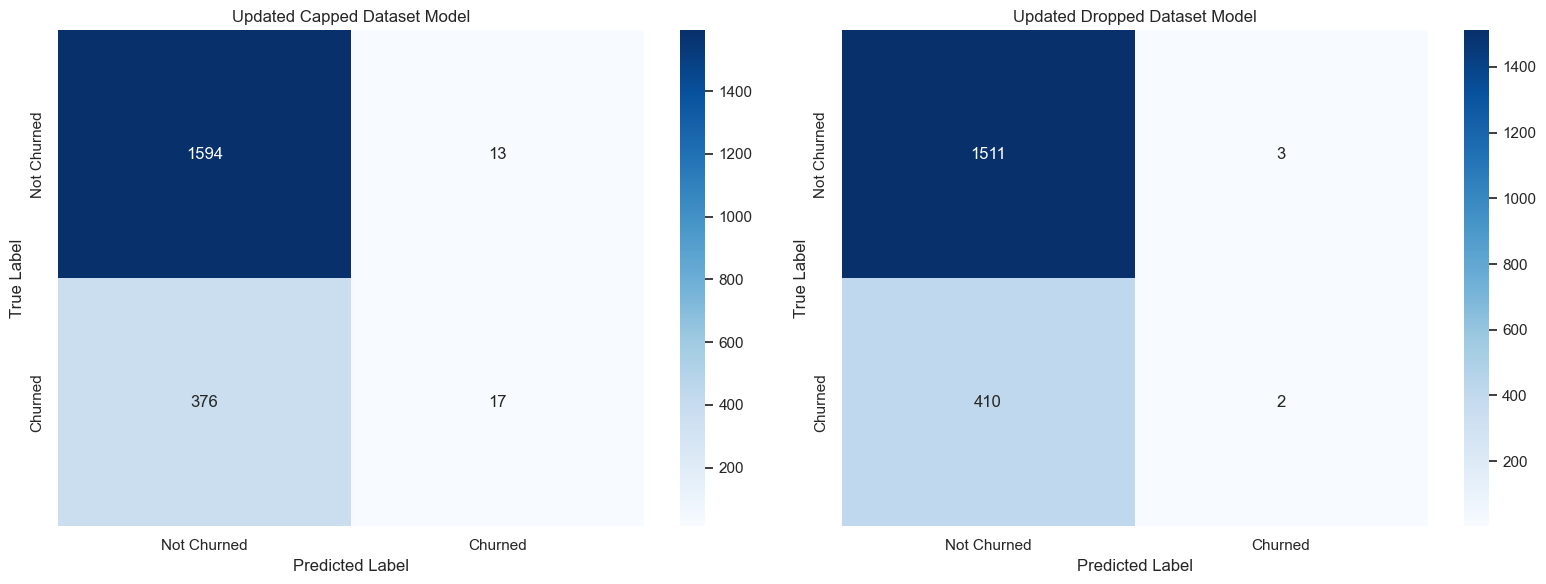

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix for the capped dataset
sns.heatmap(conf_matrix_capped_updated, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'], ax=ax[0])
ax[0].set_title('Updated Capped Dataset Model')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Confusion matrix for the dropped dataset
sns.heatmap(conf_matrix_dropped_updated, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'], ax=ax[1])
ax[1].set_title('Updated Dropped Dataset Model')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [93]:
# Display metrics used for model evaluation based on Confusion Matrix

def evaluate_confusion_matrix(cm, model_name):
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    print("--------------------------------")

# Evaluate metrics based on the confusion matrices for capped and dropped datasets
evaluate_confusion_matrix(conf_matrix_capped_updated, "Updated Capped Dataset Model")
evaluate_confusion_matrix(conf_matrix_dropped_updated, "Updated Dropped Dataset Model")


Metrics for Updated Capped Dataset Model:
Accuracy: 0.8055
Precision: 0.5667
Recall: 0.0433
Specificity: 0.9919
F1 Score: 0.0804
--------------------------------
Metrics for Updated Dropped Dataset Model:
Accuracy: 0.7856
Precision: 0.4000
Recall: 0.0049
Specificity: 0.9980
F1 Score: 0.0096
--------------------------------


In [97]:
print("After taking all observations into account, I concluded that class imbalance might be affecting my results.\n")

After taking all observations into account, I concluded that class imbalance might be affecting my results.



In [99]:
print("Lets check for class imbalance\n")

print("to check it I am going to rely on the original dataset dataset_capped_reduced_vif after removing high VIF variables\n")

dataset_capped_reduced_vif.Churned.value_counts()

Lets check for class imbalance

to check it I am going to rely on the original dataset dataset_capped_reduced_vif after removing high VIF variables



Churned
0    7963
1    2037
Name: count, dtype: int64

In [100]:
print("I can see that there is class imbalance in the Churn\n")

I can see that there is class imbalance in the Churn



In [101]:


# Initialize the Logistic Regression model with class_weight set to 'balanced'
log_reg_balanced = LogisticRegression(class_weight='balanced')

# Fit the model on the scaled training data
# Assuming X_capped_train_scaled and y_capped_train are your training data and labels
log_reg_balanced.fit(X_capped_train_scaled, y_capped_train)

# Predict on the scaled testing set
y_capped_test_pred_balanced = log_reg_balanced.predict(X_capped_test_scaled)

# Evaluate the model
print("Classification Report for the Balanced Logistic Regression Model (Capped Dataset):")
print(classification_report(y_capped_test, y_capped_test_pred_balanced))


Classification Report for the Balanced Logistic Regression Model (Capped Dataset):
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1607
           1       0.31      0.62      0.41       393

    accuracy                           0.65      2000
   macro avg       0.59      0.64      0.58      2000
weighted avg       0.76      0.65      0.68      2000



In [103]:
print("I see a drastic improvement in F1 Score.\n")
print("But still with this model the problem is that it is not able to effectively handle Churns which is our objective.\n")

I see a drastic improvement in F1 Score.

But still with this model the problem is that it is not able to effectively handle Churns which is our objective.



In [106]:
# Assuming log_reg is your fitted Logistic Regression model
y_probs = log_reg_balanced.predict_proba(X_capped_test_scaled)[:, 1]  # Get the probability of the positive class

new_threshold = 0.4  # Example threshold, adjust based on your specific needs
y_pred_new_threshold = (y_probs >= new_threshold).astype(int)

print(classification_report(y_capped_test, y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.90      0.40      0.55      1607
           1       0.25      0.83      0.39       393

    accuracy                           0.48      2000
   macro avg       0.58      0.61      0.47      2000
weighted avg       0.78      0.48      0.52      2000



In [107]:
print("I managed to get better results for recall while compromising on precision but this affected F1 score badly.\n")

I managed to get better results for recall while compromising on precision but this affected F1 score badly.



### What is the issue with your current model?

### Step 5: Recommend possible steps to enhance your model performance. [5 marks]

#### List of recommendations

1. Hyperparameter Tuning: We tried this in this project where we utilized Grid Search. We can also try Random Search to find the optimal model parameters.

2. Alternative Algorithms: Ensemble methods like Random Forests or Gradient Boosting Machines can sometimes offer better performance.

3. Address Class Imbalance: We have not checked if the dataset is imbalanced. We can consider techniques such as SMOTE for oversampling the minority class or adjusting class weights in the model.

End of Document